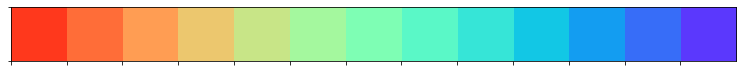

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sun Aug 16 17:10:53 2020

@author: wanxiang.shen@u.nus.edu
"""

import warnings
warnings.filterwarnings("ignore")


import pandas as pd
import numpy as np

from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import auc as calculate_auc

import matplotlib.pyplot as plt
import seaborn as sns

from aggmap import AggMap, AggMapNet

np.random.seed(666) #just for reaptable results

channel_list =  list(range(1, 50, 4))

color = sns.color_palette("rainbow_r", len(channel_list)) #PiYG
sns.palplot(color)

In [2]:
dfx  = pd.read_excel('../../03_COVID-19/COVID19.xlsx', sheet_name='data')
dfy  = pd.read_excel('../../03_COVID-19/COVID19.xlsx', sheet_name='sample_info')

dfx = dfx[dfx.columns[1:]]
cols = ["p-%s" % c for c in dfx.columns]
dfx.columns = cols

X = dfx.values
Y = pd.get_dummies(dfy['class']).values.astype(float)

mp = AggMap(dfx, metric = 'correlation')

2021-10-14 12:51:29,523 - INFO - [bidd-aggmap] - Calculating distance ...
2021-10-14 12:51:29,524 - INFO - [bidd-aggmap] - the number of process is 16


100%|##########| 88/88 [00:00<00:00, 995.00it/s]


## 5-fold cross validation and repeat 5 times 

In [3]:
n_splits = 5 #5-fold reapeat 5 times

run_all = []

for repeat_seed in [8, 16, 32, 64, 128]: #3 repeats random seeds #, 16, 32, 64, 128
    outer = KFold(n_splits = n_splits, shuffle = True, random_state = repeat_seed)
    outer_idx = list(outer.split(range(len(Y))))
    
    for c in channel_list: 
        
        mp = mp.fit(cluster_channels = c, verbose = 0)
        for i, idx in enumerate(outer_idx):
            
            train_idx, valid_idx = idx
            fold_num = "fold_%s" % str(i+1).zfill(2) 
            
            validY = Y[valid_idx]
            validx = X[valid_idx]

            trainx = X[train_idx]
            trainY = Y[train_idx]

            trainX = mp.batch_transform(trainx, scale_method = 'standard')
            validX = mp.batch_transform(validx, scale_method = 'standard')
            print("\n input train and test X shape is %s, %s " % (trainX.shape,  validX.shape))
            clf = AggMapNet.MultiClassEstimator(epochs = 50,  
                                               metric = 'ROC',
                                               batch_size = 4,
                                               verbose = 0, gpuid=0)
            clf.fit(trainX, trainY, X_valid = validX, y_valid = validY)

            history = clf.history
            history['fold'] = fold_num
            history['c'] = c
            history['repeat_seed'] = repeat_seed
            
            run_all.append(history)

2021-10-14 12:51:30,272 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2021-10-14 12:51:35,257 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2021-10-14 12:51:35,266 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 471.49it/s]



 input train and test X shape is (289, 10, 9, 1), (73, 10, 9, 1) 


100%|##########| 73/73 [00:00<00:00, 414.01it/s]



 input train and test X shape is (289, 10, 9, 1), (73, 10, 9, 1) 


100%|##########| 72/72 [00:00<00:00, 433.45it/s]



 input train and test X shape is (290, 10, 9, 1), (72, 10, 9, 1) 


100%|##########| 72/72 [00:00<00:00, 378.65it/s]



 input train and test X shape is (290, 10, 9, 1), (72, 10, 9, 1) 


100%|##########| 72/72 [00:00<00:00, 453.69it/s]



 input train and test X shape is (290, 10, 9, 1), (72, 10, 9, 1) 
2021-10-14 12:54:09,379 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2021-10-14 12:54:10,243 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2021-10-14 12:54:10,252 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 440.41it/s]



 input train and test X shape is (289, 10, 9, 5), (73, 10, 9, 5) 


100%|##########| 73/73 [00:00<00:00, 511.47it/s]



 input train and test X shape is (289, 10, 9, 5), (73, 10, 9, 5) 


100%|##########| 72/72 [00:00<00:00, 446.19it/s]



 input train and test X shape is (290, 10, 9, 5), (72, 10, 9, 5) 


100%|##########| 72/72 [00:00<00:00, 433.23it/s]



 input train and test X shape is (290, 10, 9, 5), (72, 10, 9, 5) 


100%|##########| 72/72 [00:00<00:00, 449.42it/s]



 input train and test X shape is (290, 10, 9, 5), (72, 10, 9, 5) 
2021-10-14 12:56:40,561 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2021-10-14 12:56:41,635 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2021-10-14 12:56:41,648 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 464.49it/s]



 input train and test X shape is (289, 10, 9, 9), (73, 10, 9, 9) 


100%|##########| 73/73 [00:00<00:00, 464.98it/s]



 input train and test X shape is (289, 10, 9, 9), (73, 10, 9, 9) 


100%|##########| 72/72 [00:00<00:00, 477.42it/s]



 input train and test X shape is (290, 10, 9, 9), (72, 10, 9, 9) 


100%|##########| 72/72 [00:00<00:00, 530.60it/s]



 input train and test X shape is (290, 10, 9, 9), (72, 10, 9, 9) 


100%|##########| 72/72 [00:00<00:00, 496.13it/s]



 input train and test X shape is (290, 10, 9, 9), (72, 10, 9, 9) 
2021-10-14 12:59:11,197 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2021-10-14 12:59:12,105 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2021-10-14 12:59:12,120 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 472.35it/s]



 input train and test X shape is (289, 10, 9, 13), (73, 10, 9, 13) 


100%|##########| 73/73 [00:00<00:00, 572.18it/s]



 input train and test X shape is (289, 10, 9, 13), (73, 10, 9, 13) 


100%|##########| 72/72 [00:00<00:00, 535.69it/s]



 input train and test X shape is (290, 10, 9, 13), (72, 10, 9, 13) 


100%|##########| 72/72 [00:00<00:00, 440.17it/s]



 input train and test X shape is (290, 10, 9, 13), (72, 10, 9, 13) 


100%|##########| 72/72 [00:00<00:00, 427.72it/s]



 input train and test X shape is (290, 10, 9, 13), (72, 10, 9, 13) 
2021-10-14 13:01:42,319 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2021-10-14 13:01:43,218 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2021-10-14 13:01:43,235 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 581.54it/s]



 input train and test X shape is (289, 10, 9, 17), (73, 10, 9, 17) 


100%|##########| 73/73 [00:00<00:00, 541.65it/s]



 input train and test X shape is (289, 10, 9, 17), (73, 10, 9, 17) 


100%|##########| 72/72 [00:00<00:00, 429.50it/s]



 input train and test X shape is (290, 10, 9, 17), (72, 10, 9, 17) 


100%|##########| 72/72 [00:00<00:00, 424.77it/s]



 input train and test X shape is (290, 10, 9, 17), (72, 10, 9, 17) 


100%|##########| 72/72 [00:00<00:00, 577.70it/s]



 input train and test X shape is (290, 10, 9, 17), (72, 10, 9, 17) 
2021-10-14 13:04:14,827 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2021-10-14 13:04:15,728 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2021-10-14 13:04:15,747 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 449.52it/s]



 input train and test X shape is (289, 10, 9, 21), (73, 10, 9, 21) 


100%|##########| 73/73 [00:00<00:00, 919.97it/s]



 input train and test X shape is (289, 10, 9, 21), (73, 10, 9, 21) 


100%|##########| 72/72 [00:00<00:00, 501.55it/s]



 input train and test X shape is (290, 10, 9, 21), (72, 10, 9, 21) 


100%|##########| 72/72 [00:00<00:00, 547.98it/s]



 input train and test X shape is (290, 10, 9, 21), (72, 10, 9, 21) 


100%|##########| 72/72 [00:00<00:00, 468.61it/s]



 input train and test X shape is (290, 10, 9, 21), (72, 10, 9, 21) 
2021-10-14 13:06:46,655 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2021-10-14 13:06:47,853 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2021-10-14 13:06:47,874 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 456.40it/s]



 input train and test X shape is (289, 10, 9, 25), (73, 10, 9, 25) 


100%|##########| 73/73 [00:00<00:00, 451.90it/s]



 input train and test X shape is (289, 10, 9, 25), (73, 10, 9, 25) 


100%|##########| 72/72 [00:00<00:00, 424.14it/s]



 input train and test X shape is (290, 10, 9, 25), (72, 10, 9, 25) 


100%|##########| 72/72 [00:00<00:00, 468.17it/s]



 input train and test X shape is (290, 10, 9, 25), (72, 10, 9, 25) 


100%|##########| 72/72 [00:00<00:00, 489.00it/s]



 input train and test X shape is (290, 10, 9, 25), (72, 10, 9, 25) 
2021-10-14 13:09:18,942 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2021-10-14 13:09:19,897 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2021-10-14 13:09:19,918 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 768.36it/s]



 input train and test X shape is (289, 10, 9, 29), (73, 10, 9, 29) 


100%|##########| 73/73 [00:00<00:00, 511.03it/s]



 input train and test X shape is (289, 10, 9, 29), (73, 10, 9, 29) 


100%|##########| 72/72 [00:00<00:00, 448.76it/s]



 input train and test X shape is (290, 10, 9, 29), (72, 10, 9, 29) 


100%|##########| 72/72 [00:00<00:00, 448.56it/s]



 input train and test X shape is (290, 10, 9, 29), (72, 10, 9, 29) 


100%|##########| 72/72 [00:00<00:00, 439.53it/s]



 input train and test X shape is (290, 10, 9, 29), (72, 10, 9, 29) 
2021-10-14 13:11:51,517 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2021-10-14 13:11:52,587 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2021-10-14 13:11:52,613 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 405.11it/s]



 input train and test X shape is (289, 10, 9, 33), (73, 10, 9, 33) 


100%|##########| 73/73 [00:00<00:00, 491.35it/s]



 input train and test X shape is (289, 10, 9, 33), (73, 10, 9, 33) 


100%|##########| 72/72 [00:00<00:00, 634.92it/s]



 input train and test X shape is (290, 10, 9, 33), (72, 10, 9, 33) 


100%|##########| 72/72 [00:00<00:00, 541.63it/s]



 input train and test X shape is (290, 10, 9, 33), (72, 10, 9, 33) 


100%|##########| 72/72 [00:00<00:00, 469.93it/s]



 input train and test X shape is (290, 10, 9, 33), (72, 10, 9, 33) 
2021-10-14 13:14:22,504 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2021-10-14 13:14:23,564 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2021-10-14 13:14:23,591 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 490.39it/s]



 input train and test X shape is (289, 10, 9, 37), (73, 10, 9, 37) 


100%|##########| 73/73 [00:00<00:00, 492.28it/s]



 input train and test X shape is (289, 10, 9, 37), (73, 10, 9, 37) 


100%|##########| 72/72 [00:00<00:00, 448.82it/s]



 input train and test X shape is (290, 10, 9, 37), (72, 10, 9, 37) 


100%|##########| 72/72 [00:00<00:00, 528.12it/s]



 input train and test X shape is (290, 10, 9, 37), (72, 10, 9, 37) 


100%|##########| 72/72 [00:00<00:00, 480.30it/s]



 input train and test X shape is (290, 10, 9, 37), (72, 10, 9, 37) 
2021-10-14 13:16:55,233 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2021-10-14 13:16:56,351 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2021-10-14 13:16:56,382 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 429.26it/s]



 input train and test X shape is (289, 10, 9, 41), (73, 10, 9, 41) 


100%|##########| 73/73 [00:00<00:00, 538.05it/s]



 input train and test X shape is (289, 10, 9, 41), (73, 10, 9, 41) 


100%|##########| 72/72 [00:00<00:00, 472.14it/s]



 input train and test X shape is (290, 10, 9, 41), (72, 10, 9, 41) 


100%|##########| 72/72 [00:00<00:00, 400.09it/s]



 input train and test X shape is (290, 10, 9, 41), (72, 10, 9, 41) 


100%|##########| 72/72 [00:00<00:00, 411.07it/s]



 input train and test X shape is (290, 10, 9, 41), (72, 10, 9, 41) 
2021-10-14 13:19:26,605 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2021-10-14 13:19:27,654 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2021-10-14 13:19:27,685 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 398.47it/s]



 input train and test X shape is (289, 10, 9, 45), (73, 10, 9, 45) 


100%|##########| 73/73 [00:00<00:00, 448.50it/s]



 input train and test X shape is (289, 10, 9, 45), (73, 10, 9, 45) 


100%|##########| 72/72 [00:00<00:00, 458.51it/s]



 input train and test X shape is (290, 10, 9, 45), (72, 10, 9, 45) 


100%|##########| 72/72 [00:00<00:00, 524.02it/s]



 input train and test X shape is (290, 10, 9, 45), (72, 10, 9, 45) 


100%|##########| 72/72 [00:00<00:00, 394.99it/s]



 input train and test X shape is (290, 10, 9, 45), (72, 10, 9, 45) 
2021-10-14 13:21:59,059 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2021-10-14 13:22:00,190 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2021-10-14 13:22:00,223 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 459.82it/s]



 input train and test X shape is (289, 10, 9, 49), (73, 10, 9, 49) 


100%|##########| 73/73 [00:00<00:00, 477.15it/s]



 input train and test X shape is (289, 10, 9, 49), (73, 10, 9, 49) 


100%|##########| 72/72 [00:00<00:00, 537.21it/s]



 input train and test X shape is (290, 10, 9, 49), (72, 10, 9, 49) 


100%|##########| 72/72 [00:00<00:00, 496.26it/s]



 input train and test X shape is (290, 10, 9, 49), (72, 10, 9, 49) 


100%|##########| 72/72 [00:00<00:00, 463.39it/s]



 input train and test X shape is (290, 10, 9, 49), (72, 10, 9, 49) 
2021-10-14 13:24:30,779 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2021-10-14 13:24:31,843 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2021-10-14 13:24:31,852 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 589.26it/s]



 input train and test X shape is (289, 10, 9, 1), (73, 10, 9, 1) 


100%|##########| 73/73 [00:00<00:00, 508.12it/s]



 input train and test X shape is (289, 10, 9, 1), (73, 10, 9, 1) 


100%|##########| 72/72 [00:00<00:00, 439.29it/s]



 input train and test X shape is (290, 10, 9, 1), (72, 10, 9, 1) 


100%|##########| 72/72 [00:00<00:00, 409.02it/s]



 input train and test X shape is (290, 10, 9, 1), (72, 10, 9, 1) 


100%|##########| 72/72 [00:00<00:00, 449.43it/s]



 input train and test X shape is (290, 10, 9, 1), (72, 10, 9, 1) 
2021-10-14 13:26:59,900 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2021-10-14 13:27:01,066 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2021-10-14 13:27:01,077 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 712.03it/s]



 input train and test X shape is (289, 10, 9, 5), (73, 10, 9, 5) 


100%|##########| 73/73 [00:00<00:00, 575.85it/s]



 input train and test X shape is (289, 10, 9, 5), (73, 10, 9, 5) 


100%|##########| 72/72 [00:00<00:00, 412.23it/s]



 input train and test X shape is (290, 10, 9, 5), (72, 10, 9, 5) 


100%|##########| 72/72 [00:00<00:00, 385.66it/s]



 input train and test X shape is (290, 10, 9, 5), (72, 10, 9, 5) 


100%|##########| 72/72 [00:00<00:00, 426.33it/s]



 input train and test X shape is (290, 10, 9, 5), (72, 10, 9, 5) 
2021-10-14 13:29:31,837 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2021-10-14 13:29:32,790 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2021-10-14 13:29:32,803 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 485.06it/s]



 input train and test X shape is (289, 10, 9, 9), (73, 10, 9, 9) 


100%|##########| 73/73 [00:00<00:00, 469.14it/s]



 input train and test X shape is (289, 10, 9, 9), (73, 10, 9, 9) 


100%|##########| 72/72 [00:00<00:00, 495.17it/s]



 input train and test X shape is (290, 10, 9, 9), (72, 10, 9, 9) 


100%|##########| 72/72 [00:00<00:00, 453.24it/s]



 input train and test X shape is (290, 10, 9, 9), (72, 10, 9, 9) 


100%|##########| 72/72 [00:00<00:00, 522.67it/s]



 input train and test X shape is (290, 10, 9, 9), (72, 10, 9, 9) 
2021-10-14 13:32:02,446 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2021-10-14 13:32:03,344 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2021-10-14 13:32:03,358 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 501.77it/s]



 input train and test X shape is (289, 10, 9, 13), (73, 10, 9, 13) 


100%|##########| 73/73 [00:00<00:00, 487.30it/s]



 input train and test X shape is (289, 10, 9, 13), (73, 10, 9, 13) 


100%|##########| 72/72 [00:00<00:00, 424.37it/s]



 input train and test X shape is (290, 10, 9, 13), (72, 10, 9, 13) 


100%|##########| 72/72 [00:00<00:00, 606.65it/s]



 input train and test X shape is (290, 10, 9, 13), (72, 10, 9, 13) 


100%|##########| 72/72 [00:00<00:00, 448.78it/s]



 input train and test X shape is (290, 10, 9, 13), (72, 10, 9, 13) 
2021-10-14 13:34:30,001 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2021-10-14 13:34:30,937 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2021-10-14 13:34:30,953 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 467.68it/s]



 input train and test X shape is (289, 10, 9, 17), (73, 10, 9, 17) 


100%|##########| 73/73 [00:00<00:00, 490.51it/s]



 input train and test X shape is (289, 10, 9, 17), (73, 10, 9, 17) 


100%|##########| 72/72 [00:00<00:00, 447.75it/s]



 input train and test X shape is (290, 10, 9, 17), (72, 10, 9, 17) 


100%|##########| 72/72 [00:00<00:00, 763.90it/s]



 input train and test X shape is (290, 10, 9, 17), (72, 10, 9, 17) 


100%|##########| 72/72 [00:00<00:00, 459.78it/s]



 input train and test X shape is (290, 10, 9, 17), (72, 10, 9, 17) 
2021-10-14 13:37:02,173 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2021-10-14 13:37:03,264 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2021-10-14 13:37:03,283 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 605.02it/s]



 input train and test X shape is (289, 10, 9, 21), (73, 10, 9, 21) 


100%|##########| 73/73 [00:00<00:00, 831.62it/s]



 input train and test X shape is (289, 10, 9, 21), (73, 10, 9, 21) 


100%|##########| 72/72 [00:00<00:00, 452.14it/s]



 input train and test X shape is (290, 10, 9, 21), (72, 10, 9, 21) 


100%|##########| 72/72 [00:00<00:00, 487.04it/s]



 input train and test X shape is (290, 10, 9, 21), (72, 10, 9, 21) 


100%|##########| 72/72 [00:00<00:00, 446.44it/s]



 input train and test X shape is (290, 10, 9, 21), (72, 10, 9, 21) 
2021-10-14 13:39:34,402 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2021-10-14 13:39:35,365 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2021-10-14 13:39:35,385 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 441.43it/s]



 input train and test X shape is (289, 10, 9, 25), (73, 10, 9, 25) 


100%|##########| 73/73 [00:00<00:00, 468.85it/s]



 input train and test X shape is (289, 10, 9, 25), (73, 10, 9, 25) 


100%|##########| 72/72 [00:00<00:00, 454.69it/s]



 input train and test X shape is (290, 10, 9, 25), (72, 10, 9, 25) 


100%|##########| 72/72 [00:00<00:00, 491.20it/s]



 input train and test X shape is (290, 10, 9, 25), (72, 10, 9, 25) 


100%|##########| 72/72 [00:00<00:00, 539.76it/s]



 input train and test X shape is (290, 10, 9, 25), (72, 10, 9, 25) 
2021-10-14 13:42:05,919 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2021-10-14 13:42:06,899 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2021-10-14 13:42:06,923 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 445.62it/s]



 input train and test X shape is (289, 10, 9, 29), (73, 10, 9, 29) 


100%|##########| 73/73 [00:00<00:00, 484.19it/s]



 input train and test X shape is (289, 10, 9, 29), (73, 10, 9, 29) 


100%|##########| 72/72 [00:00<00:00, 466.72it/s]



 input train and test X shape is (290, 10, 9, 29), (72, 10, 9, 29) 


100%|##########| 72/72 [00:00<00:00, 473.01it/s]



 input train and test X shape is (290, 10, 9, 29), (72, 10, 9, 29) 


100%|##########| 72/72 [00:00<00:00, 509.33it/s]



 input train and test X shape is (290, 10, 9, 29), (72, 10, 9, 29) 
2021-10-14 13:44:38,010 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2021-10-14 13:44:39,064 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2021-10-14 13:44:39,088 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 503.17it/s]



 input train and test X shape is (289, 10, 9, 33), (73, 10, 9, 33) 


100%|##########| 73/73 [00:00<00:00, 447.88it/s]



 input train and test X shape is (289, 10, 9, 33), (73, 10, 9, 33) 


100%|##########| 72/72 [00:00<00:00, 490.48it/s]



 input train and test X shape is (290, 10, 9, 33), (72, 10, 9, 33) 


100%|##########| 72/72 [00:00<00:00, 374.42it/s]



 input train and test X shape is (290, 10, 9, 33), (72, 10, 9, 33) 


100%|##########| 72/72 [00:00<00:00, 499.68it/s]



 input train and test X shape is (290, 10, 9, 33), (72, 10, 9, 33) 
2021-10-14 13:47:09,345 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2021-10-14 13:47:10,278 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2021-10-14 13:47:10,305 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 517.33it/s]



 input train and test X shape is (289, 10, 9, 37), (73, 10, 9, 37) 


100%|##########| 73/73 [00:00<00:00, 437.36it/s]



 input train and test X shape is (289, 10, 9, 37), (73, 10, 9, 37) 


100%|##########| 72/72 [00:00<00:00, 402.09it/s]



 input train and test X shape is (290, 10, 9, 37), (72, 10, 9, 37) 


100%|##########| 72/72 [00:00<00:00, 676.88it/s]



 input train and test X shape is (290, 10, 9, 37), (72, 10, 9, 37) 


100%|##########| 72/72 [00:00<00:00, 488.09it/s]



 input train and test X shape is (290, 10, 9, 37), (72, 10, 9, 37) 
2021-10-14 13:49:42,171 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2021-10-14 13:49:43,242 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2021-10-14 13:49:43,272 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 426.83it/s]



 input train and test X shape is (289, 10, 9, 41), (73, 10, 9, 41) 


100%|##########| 73/73 [00:00<00:00, 730.18it/s]



 input train and test X shape is (289, 10, 9, 41), (73, 10, 9, 41) 


100%|##########| 72/72 [00:00<00:00, 405.56it/s]



 input train and test X shape is (290, 10, 9, 41), (72, 10, 9, 41) 


100%|##########| 72/72 [00:00<00:00, 448.92it/s]



 input train and test X shape is (290, 10, 9, 41), (72, 10, 9, 41) 


100%|##########| 72/72 [00:00<00:00, 414.71it/s]



 input train and test X shape is (290, 10, 9, 41), (72, 10, 9, 41) 
2021-10-14 13:52:12,941 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2021-10-14 13:52:13,862 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2021-10-14 13:52:13,893 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 405.60it/s]



 input train and test X shape is (289, 10, 9, 45), (73, 10, 9, 45) 


100%|##########| 73/73 [00:00<00:00, 481.28it/s]



 input train and test X shape is (289, 10, 9, 45), (73, 10, 9, 45) 


100%|##########| 72/72 [00:00<00:00, 588.18it/s]



 input train and test X shape is (290, 10, 9, 45), (72, 10, 9, 45) 


100%|##########| 72/72 [00:00<00:00, 387.38it/s]



 input train and test X shape is (290, 10, 9, 45), (72, 10, 9, 45) 


100%|##########| 72/72 [00:00<00:00, 546.42it/s]



 input train and test X shape is (290, 10, 9, 45), (72, 10, 9, 45) 
2021-10-14 13:54:41,744 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2021-10-14 13:54:42,597 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2021-10-14 13:54:42,629 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 523.07it/s]



 input train and test X shape is (289, 10, 9, 49), (73, 10, 9, 49) 


100%|##########| 73/73 [00:00<00:00, 460.16it/s]



 input train and test X shape is (289, 10, 9, 49), (73, 10, 9, 49) 


100%|##########| 72/72 [00:00<00:00, 470.25it/s]



 input train and test X shape is (290, 10, 9, 49), (72, 10, 9, 49) 


100%|##########| 72/72 [00:00<00:00, 450.17it/s]



 input train and test X shape is (290, 10, 9, 49), (72, 10, 9, 49) 


100%|##########| 72/72 [00:00<00:00, 387.82it/s]



 input train and test X shape is (290, 10, 9, 49), (72, 10, 9, 49) 
2021-10-14 13:57:13,716 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2021-10-14 13:57:14,770 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2021-10-14 13:57:14,779 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 832.83it/s]



 input train and test X shape is (289, 10, 9, 1), (73, 10, 9, 1) 


100%|##########| 73/73 [00:00<00:00, 523.51it/s]



 input train and test X shape is (289, 10, 9, 1), (73, 10, 9, 1) 


100%|##########| 72/72 [00:00<00:00, 459.20it/s]



 input train and test X shape is (290, 10, 9, 1), (72, 10, 9, 1) 


100%|##########| 72/72 [00:00<00:00, 340.30it/s]



 input train and test X shape is (290, 10, 9, 1), (72, 10, 9, 1) 


100%|##########| 72/72 [00:00<00:00, 481.80it/s]



 input train and test X shape is (290, 10, 9, 1), (72, 10, 9, 1) 
2021-10-14 13:59:43,196 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2021-10-14 13:59:44,082 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2021-10-14 13:59:44,092 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 718.42it/s]



 input train and test X shape is (289, 10, 9, 5), (73, 10, 9, 5) 


100%|##########| 73/73 [00:00<00:00, 450.16it/s]



 input train and test X shape is (289, 10, 9, 5), (73, 10, 9, 5) 


100%|##########| 72/72 [00:00<00:00, 454.57it/s]



 input train and test X shape is (290, 10, 9, 5), (72, 10, 9, 5) 


100%|##########| 72/72 [00:00<00:00, 436.69it/s]



 input train and test X shape is (290, 10, 9, 5), (72, 10, 9, 5) 


100%|##########| 72/72 [00:00<00:00, 537.04it/s]



 input train and test X shape is (290, 10, 9, 5), (72, 10, 9, 5) 
2021-10-14 14:02:14,503 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2021-10-14 14:02:15,367 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2021-10-14 14:02:15,379 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 643.81it/s]



 input train and test X shape is (289, 10, 9, 9), (73, 10, 9, 9) 


100%|##########| 73/73 [00:00<00:00, 523.13it/s]



 input train and test X shape is (289, 10, 9, 9), (73, 10, 9, 9) 


100%|##########| 72/72 [00:00<00:00, 447.40it/s]



 input train and test X shape is (290, 10, 9, 9), (72, 10, 9, 9) 


100%|##########| 72/72 [00:00<00:00, 431.49it/s]



 input train and test X shape is (290, 10, 9, 9), (72, 10, 9, 9) 


100%|##########| 72/72 [00:00<00:00, 444.27it/s]



 input train and test X shape is (290, 10, 9, 9), (72, 10, 9, 9) 
2021-10-14 14:04:46,349 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2021-10-14 14:04:47,241 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2021-10-14 14:04:47,255 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 472.49it/s]



 input train and test X shape is (289, 10, 9, 13), (73, 10, 9, 13) 


100%|##########| 73/73 [00:00<00:00, 528.98it/s]



 input train and test X shape is (289, 10, 9, 13), (73, 10, 9, 13) 


100%|##########| 72/72 [00:00<00:00, 457.57it/s]



 input train and test X shape is (290, 10, 9, 13), (72, 10, 9, 13) 


100%|##########| 72/72 [00:00<00:00, 415.29it/s]



 input train and test X shape is (290, 10, 9, 13), (72, 10, 9, 13) 


100%|##########| 72/72 [00:00<00:00, 517.63it/s]



 input train and test X shape is (290, 10, 9, 13), (72, 10, 9, 13) 
2021-10-14 14:07:17,978 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2021-10-14 14:07:18,867 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2021-10-14 14:07:18,883 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 535.47it/s]



 input train and test X shape is (289, 10, 9, 17), (73, 10, 9, 17) 


100%|##########| 73/73 [00:00<00:00, 526.59it/s]



 input train and test X shape is (289, 10, 9, 17), (73, 10, 9, 17) 


100%|##########| 72/72 [00:00<00:00, 514.76it/s]



 input train and test X shape is (290, 10, 9, 17), (72, 10, 9, 17) 


100%|##########| 72/72 [00:00<00:00, 512.12it/s]



 input train and test X shape is (290, 10, 9, 17), (72, 10, 9, 17) 


100%|##########| 72/72 [00:00<00:00, 524.95it/s]



 input train and test X shape is (290, 10, 9, 17), (72, 10, 9, 17) 
2021-10-14 14:09:48,794 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2021-10-14 14:09:49,657 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2021-10-14 14:09:49,675 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 442.79it/s]



 input train and test X shape is (289, 10, 9, 21), (73, 10, 9, 21) 


100%|##########| 73/73 [00:00<00:00, 706.67it/s]



 input train and test X shape is (289, 10, 9, 21), (73, 10, 9, 21) 


100%|##########| 72/72 [00:00<00:00, 435.37it/s]



 input train and test X shape is (290, 10, 9, 21), (72, 10, 9, 21) 


100%|##########| 72/72 [00:00<00:00, 688.77it/s]



 input train and test X shape is (290, 10, 9, 21), (72, 10, 9, 21) 


100%|##########| 72/72 [00:00<00:00, 498.18it/s]



 input train and test X shape is (290, 10, 9, 21), (72, 10, 9, 21) 
2021-10-14 14:12:21,809 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2021-10-14 14:12:22,741 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2021-10-14 14:12:22,763 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 558.45it/s]



 input train and test X shape is (289, 10, 9, 25), (73, 10, 9, 25) 


100%|##########| 73/73 [00:00<00:00, 476.02it/s]



 input train and test X shape is (289, 10, 9, 25), (73, 10, 9, 25) 


100%|##########| 72/72 [00:00<00:00, 418.05it/s]



 input train and test X shape is (290, 10, 9, 25), (72, 10, 9, 25) 


100%|##########| 72/72 [00:00<00:00, 467.67it/s]



 input train and test X shape is (290, 10, 9, 25), (72, 10, 9, 25) 


100%|##########| 72/72 [00:00<00:00, 485.57it/s]



 input train and test X shape is (290, 10, 9, 25), (72, 10, 9, 25) 
2021-10-14 14:14:52,039 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2021-10-14 14:14:52,927 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2021-10-14 14:14:52,949 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 514.19it/s]



 input train and test X shape is (289, 10, 9, 29), (73, 10, 9, 29) 


100%|##########| 73/73 [00:00<00:00, 463.22it/s]



 input train and test X shape is (289, 10, 9, 29), (73, 10, 9, 29) 


100%|##########| 72/72 [00:00<00:00, 466.90it/s]



 input train and test X shape is (290, 10, 9, 29), (72, 10, 9, 29) 


100%|##########| 72/72 [00:00<00:00, 732.56it/s]



 input train and test X shape is (290, 10, 9, 29), (72, 10, 9, 29) 


100%|##########| 72/72 [00:00<00:00, 563.89it/s]



 input train and test X shape is (290, 10, 9, 29), (72, 10, 9, 29) 
2021-10-14 14:17:24,412 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2021-10-14 14:17:25,289 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2021-10-14 14:17:25,313 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 585.17it/s]



 input train and test X shape is (289, 10, 9, 33), (73, 10, 9, 33) 


100%|##########| 73/73 [00:00<00:00, 509.48it/s]



 input train and test X shape is (289, 10, 9, 33), (73, 10, 9, 33) 


100%|##########| 72/72 [00:00<00:00, 441.49it/s]



 input train and test X shape is (290, 10, 9, 33), (72, 10, 9, 33) 


100%|##########| 72/72 [00:00<00:00, 488.24it/s]



 input train and test X shape is (290, 10, 9, 33), (72, 10, 9, 33) 


100%|##########| 72/72 [00:00<00:00, 649.75it/s]



 input train and test X shape is (290, 10, 9, 33), (72, 10, 9, 33) 
2021-10-14 14:19:57,518 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2021-10-14 14:19:58,533 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2021-10-14 14:19:58,559 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 597.68it/s]



 input train and test X shape is (289, 10, 9, 37), (73, 10, 9, 37) 


100%|##########| 73/73 [00:00<00:00, 443.67it/s]



 input train and test X shape is (289, 10, 9, 37), (73, 10, 9, 37) 


100%|##########| 72/72 [00:00<00:00, 501.01it/s]



 input train and test X shape is (290, 10, 9, 37), (72, 10, 9, 37) 


100%|##########| 72/72 [00:00<00:00, 536.76it/s]



 input train and test X shape is (290, 10, 9, 37), (72, 10, 9, 37) 


100%|##########| 72/72 [00:00<00:00, 421.11it/s]



 input train and test X shape is (290, 10, 9, 37), (72, 10, 9, 37) 
2021-10-14 14:22:30,739 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2021-10-14 14:22:31,582 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2021-10-14 14:22:31,609 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 575.65it/s]



 input train and test X shape is (289, 10, 9, 41), (73, 10, 9, 41) 


100%|##########| 73/73 [00:00<00:00, 460.51it/s]



 input train and test X shape is (289, 10, 9, 41), (73, 10, 9, 41) 


100%|##########| 72/72 [00:00<00:00, 437.76it/s]



 input train and test X shape is (290, 10, 9, 41), (72, 10, 9, 41) 


100%|##########| 72/72 [00:00<00:00, 466.11it/s]



 input train and test X shape is (290, 10, 9, 41), (72, 10, 9, 41) 


100%|##########| 72/72 [00:00<00:00, 429.91it/s]



 input train and test X shape is (290, 10, 9, 41), (72, 10, 9, 41) 
2021-10-14 14:25:03,155 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2021-10-14 14:25:04,041 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2021-10-14 14:25:04,070 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 462.26it/s]



 input train and test X shape is (289, 10, 9, 45), (73, 10, 9, 45) 


100%|##########| 73/73 [00:00<00:00, 513.81it/s]



 input train and test X shape is (289, 10, 9, 45), (73, 10, 9, 45) 


100%|##########| 72/72 [00:00<00:00, 470.82it/s]



 input train and test X shape is (290, 10, 9, 45), (72, 10, 9, 45) 


100%|##########| 72/72 [00:00<00:00, 479.57it/s]



 input train and test X shape is (290, 10, 9, 45), (72, 10, 9, 45) 


100%|##########| 72/72 [00:00<00:00, 449.25it/s]



 input train and test X shape is (290, 10, 9, 45), (72, 10, 9, 45) 
2021-10-14 14:27:34,359 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2021-10-14 14:27:35,170 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2021-10-14 14:27:35,202 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 819.45it/s]



 input train and test X shape is (289, 10, 9, 49), (73, 10, 9, 49) 


100%|##########| 73/73 [00:00<00:00, 492.86it/s]



 input train and test X shape is (289, 10, 9, 49), (73, 10, 9, 49) 


100%|##########| 72/72 [00:00<00:00, 443.26it/s]



 input train and test X shape is (290, 10, 9, 49), (72, 10, 9, 49) 


100%|##########| 72/72 [00:00<00:00, 476.23it/s]



 input train and test X shape is (290, 10, 9, 49), (72, 10, 9, 49) 


100%|##########| 72/72 [00:00<00:00, 438.00it/s]



 input train and test X shape is (290, 10, 9, 49), (72, 10, 9, 49) 
2021-10-14 14:30:07,117 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2021-10-14 14:30:08,003 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2021-10-14 14:30:08,012 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 509.03it/s]



 input train and test X shape is (289, 10, 9, 1), (73, 10, 9, 1) 


100%|##########| 73/73 [00:00<00:00, 460.91it/s]



 input train and test X shape is (289, 10, 9, 1), (73, 10, 9, 1) 


100%|##########| 72/72 [00:00<00:00, 482.94it/s]



 input train and test X shape is (290, 10, 9, 1), (72, 10, 9, 1) 


100%|##########| 72/72 [00:00<00:00, 537.21it/s]



 input train and test X shape is (290, 10, 9, 1), (72, 10, 9, 1) 


100%|##########| 72/72 [00:00<00:00, 513.94it/s]



 input train and test X shape is (290, 10, 9, 1), (72, 10, 9, 1) 
2021-10-14 14:32:36,330 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2021-10-14 14:32:37,381 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2021-10-14 14:32:37,392 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 503.74it/s]



 input train and test X shape is (289, 10, 9, 5), (73, 10, 9, 5) 


100%|##########| 73/73 [00:00<00:00, 534.79it/s]



 input train and test X shape is (289, 10, 9, 5), (73, 10, 9, 5) 


100%|##########| 72/72 [00:00<00:00, 418.89it/s]



 input train and test X shape is (290, 10, 9, 5), (72, 10, 9, 5) 


100%|##########| 72/72 [00:00<00:00, 497.15it/s]



 input train and test X shape is (290, 10, 9, 5), (72, 10, 9, 5) 


100%|##########| 72/72 [00:00<00:00, 420.67it/s]



 input train and test X shape is (290, 10, 9, 5), (72, 10, 9, 5) 
2021-10-14 14:35:08,466 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2021-10-14 14:35:09,521 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2021-10-14 14:35:09,534 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 553.22it/s]



 input train and test X shape is (289, 10, 9, 9), (73, 10, 9, 9) 


100%|##########| 73/73 [00:00<00:00, 518.83it/s]



 input train and test X shape is (289, 10, 9, 9), (73, 10, 9, 9) 


100%|##########| 72/72 [00:00<00:00, 539.19it/s]



 input train and test X shape is (290, 10, 9, 9), (72, 10, 9, 9) 


100%|##########| 72/72 [00:00<00:00, 540.64it/s]



 input train and test X shape is (290, 10, 9, 9), (72, 10, 9, 9) 


100%|##########| 72/72 [00:00<00:00, 672.06it/s]



 input train and test X shape is (290, 10, 9, 9), (72, 10, 9, 9) 
2021-10-14 14:37:38,849 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2021-10-14 14:37:39,859 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2021-10-14 14:37:39,874 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 537.21it/s]



 input train and test X shape is (289, 10, 9, 13), (73, 10, 9, 13) 


100%|##########| 73/73 [00:00<00:00, 452.40it/s]



 input train and test X shape is (289, 10, 9, 13), (73, 10, 9, 13) 


100%|##########| 72/72 [00:00<00:00, 510.49it/s]



 input train and test X shape is (290, 10, 9, 13), (72, 10, 9, 13) 


100%|##########| 72/72 [00:00<00:00, 489.38it/s]



 input train and test X shape is (290, 10, 9, 13), (72, 10, 9, 13) 


100%|##########| 72/72 [00:00<00:00, 417.59it/s]



 input train and test X shape is (290, 10, 9, 13), (72, 10, 9, 13) 
2021-10-14 14:40:11,118 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2021-10-14 14:40:12,006 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2021-10-14 14:40:12,023 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 530.03it/s]



 input train and test X shape is (289, 10, 9, 17), (73, 10, 9, 17) 


100%|##########| 73/73 [00:00<00:00, 489.04it/s]



 input train and test X shape is (289, 10, 9, 17), (73, 10, 9, 17) 


100%|##########| 72/72 [00:00<00:00, 501.99it/s]



 input train and test X shape is (290, 10, 9, 17), (72, 10, 9, 17) 


100%|##########| 72/72 [00:00<00:00, 471.81it/s]



 input train and test X shape is (290, 10, 9, 17), (72, 10, 9, 17) 


100%|##########| 72/72 [00:00<00:00, 482.65it/s]



 input train and test X shape is (290, 10, 9, 17), (72, 10, 9, 17) 
2021-10-14 14:42:41,529 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2021-10-14 14:42:42,498 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2021-10-14 14:42:42,517 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 687.94it/s]



 input train and test X shape is (289, 10, 9, 21), (73, 10, 9, 21) 


100%|##########| 73/73 [00:00<00:00, 490.13it/s]



 input train and test X shape is (289, 10, 9, 21), (73, 10, 9, 21) 


100%|##########| 72/72 [00:00<00:00, 765.19it/s]



 input train and test X shape is (290, 10, 9, 21), (72, 10, 9, 21) 


100%|##########| 72/72 [00:00<00:00, 616.69it/s]



 input train and test X shape is (290, 10, 9, 21), (72, 10, 9, 21) 


100%|##########| 72/72 [00:00<00:00, 444.25it/s]



 input train and test X shape is (290, 10, 9, 21), (72, 10, 9, 21) 
2021-10-14 14:45:12,417 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2021-10-14 14:45:13,294 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2021-10-14 14:45:13,314 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 623.72it/s]



 input train and test X shape is (289, 10, 9, 25), (73, 10, 9, 25) 


100%|##########| 73/73 [00:00<00:00, 415.36it/s]



 input train and test X shape is (289, 10, 9, 25), (73, 10, 9, 25) 


100%|##########| 72/72 [00:00<00:00, 456.30it/s]



 input train and test X shape is (290, 10, 9, 25), (72, 10, 9, 25) 


100%|##########| 72/72 [00:00<00:00, 459.40it/s]



 input train and test X shape is (290, 10, 9, 25), (72, 10, 9, 25) 


100%|##########| 72/72 [00:00<00:00, 456.71it/s]



 input train and test X shape is (290, 10, 9, 25), (72, 10, 9, 25) 
2021-10-14 14:47:43,597 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2021-10-14 14:47:44,712 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2021-10-14 14:47:44,734 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 528.13it/s]



 input train and test X shape is (289, 10, 9, 29), (73, 10, 9, 29) 


100%|##########| 73/73 [00:00<00:00, 462.57it/s]



 input train and test X shape is (289, 10, 9, 29), (73, 10, 9, 29) 


100%|##########| 72/72 [00:00<00:00, 439.27it/s]



 input train and test X shape is (290, 10, 9, 29), (72, 10, 9, 29) 


100%|##########| 72/72 [00:00<00:00, 459.63it/s]



 input train and test X shape is (290, 10, 9, 29), (72, 10, 9, 29) 


100%|##########| 72/72 [00:00<00:00, 512.61it/s]



 input train and test X shape is (290, 10, 9, 29), (72, 10, 9, 29) 
2021-10-14 14:50:15,740 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2021-10-14 14:50:16,776 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2021-10-14 14:50:16,800 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 613.73it/s]



 input train and test X shape is (289, 10, 9, 33), (73, 10, 9, 33) 


100%|##########| 73/73 [00:00<00:00, 432.58it/s]



 input train and test X shape is (289, 10, 9, 33), (73, 10, 9, 33) 


100%|##########| 72/72 [00:00<00:00, 494.69it/s]



 input train and test X shape is (290, 10, 9, 33), (72, 10, 9, 33) 


100%|##########| 72/72 [00:00<00:00, 423.26it/s]



 input train and test X shape is (290, 10, 9, 33), (72, 10, 9, 33) 


100%|##########| 72/72 [00:00<00:00, 450.19it/s]



 input train and test X shape is (290, 10, 9, 33), (72, 10, 9, 33) 
2021-10-14 14:52:47,045 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2021-10-14 14:52:47,917 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2021-10-14 14:52:47,943 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 510.43it/s]



 input train and test X shape is (289, 10, 9, 37), (73, 10, 9, 37) 


100%|##########| 73/73 [00:00<00:00, 460.39it/s]



 input train and test X shape is (289, 10, 9, 37), (73, 10, 9, 37) 


100%|##########| 72/72 [00:00<00:00, 540.87it/s]



 input train and test X shape is (290, 10, 9, 37), (72, 10, 9, 37) 


100%|##########| 72/72 [00:00<00:00, 505.79it/s]



 input train and test X shape is (290, 10, 9, 37), (72, 10, 9, 37) 


100%|##########| 72/72 [00:00<00:00, 448.19it/s]



 input train and test X shape is (290, 10, 9, 37), (72, 10, 9, 37) 
2021-10-14 14:55:20,364 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2021-10-14 14:55:21,240 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2021-10-14 14:55:21,268 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 490.77it/s]



 input train and test X shape is (289, 10, 9, 41), (73, 10, 9, 41) 


100%|##########| 73/73 [00:00<00:00, 436.67it/s]



 input train and test X shape is (289, 10, 9, 41), (73, 10, 9, 41) 


100%|##########| 72/72 [00:00<00:00, 709.20it/s]



 input train and test X shape is (290, 10, 9, 41), (72, 10, 9, 41) 


100%|##########| 72/72 [00:00<00:00, 488.47it/s]



 input train and test X shape is (290, 10, 9, 41), (72, 10, 9, 41) 


100%|##########| 72/72 [00:00<00:00, 460.24it/s]



 input train and test X shape is (290, 10, 9, 41), (72, 10, 9, 41) 
2021-10-14 14:57:52,648 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2021-10-14 14:57:53,554 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2021-10-14 14:57:53,586 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 485.97it/s]



 input train and test X shape is (289, 10, 9, 45), (73, 10, 9, 45) 


100%|##########| 73/73 [00:00<00:00, 552.79it/s]



 input train and test X shape is (289, 10, 9, 45), (73, 10, 9, 45) 


100%|##########| 72/72 [00:00<00:00, 584.14it/s]



 input train and test X shape is (290, 10, 9, 45), (72, 10, 9, 45) 


100%|##########| 72/72 [00:00<00:00, 488.35it/s]



 input train and test X shape is (290, 10, 9, 45), (72, 10, 9, 45) 


100%|##########| 72/72 [00:00<00:00, 440.83it/s]



 input train and test X shape is (290, 10, 9, 45), (72, 10, 9, 45) 
2021-10-14 15:00:25,296 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2021-10-14 15:00:26,319 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2021-10-14 15:00:26,351 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 571.95it/s]



 input train and test X shape is (289, 10, 9, 49), (73, 10, 9, 49) 


100%|##########| 73/73 [00:00<00:00, 546.35it/s]



 input train and test X shape is (289, 10, 9, 49), (73, 10, 9, 49) 


100%|##########| 72/72 [00:00<00:00, 640.51it/s]



 input train and test X shape is (290, 10, 9, 49), (72, 10, 9, 49) 


100%|##########| 72/72 [00:00<00:00, 416.14it/s]



 input train and test X shape is (290, 10, 9, 49), (72, 10, 9, 49) 


100%|##########| 72/72 [00:00<00:00, 472.26it/s]



 input train and test X shape is (290, 10, 9, 49), (72, 10, 9, 49) 
2021-10-14 15:02:57,666 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2021-10-14 15:02:58,683 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2021-10-14 15:02:58,692 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 465.86it/s]



 input train and test X shape is (289, 10, 9, 1), (73, 10, 9, 1) 


100%|##########| 73/73 [00:00<00:00, 500.30it/s]



 input train and test X shape is (289, 10, 9, 1), (73, 10, 9, 1) 


100%|##########| 72/72 [00:00<00:00, 883.58it/s]



 input train and test X shape is (290, 10, 9, 1), (72, 10, 9, 1) 


100%|##########| 72/72 [00:00<00:00, 605.21it/s]



 input train and test X shape is (290, 10, 9, 1), (72, 10, 9, 1) 


100%|##########| 72/72 [00:00<00:00, 488.88it/s]



 input train and test X shape is (290, 10, 9, 1), (72, 10, 9, 1) 
2021-10-14 15:05:21,811 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2021-10-14 15:05:22,960 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2021-10-14 15:05:22,971 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 480.51it/s]



 input train and test X shape is (289, 10, 9, 5), (73, 10, 9, 5) 


100%|##########| 73/73 [00:00<00:00, 406.97it/s]



 input train and test X shape is (289, 10, 9, 5), (73, 10, 9, 5) 


100%|##########| 72/72 [00:00<00:00, 481.11it/s]



 input train and test X shape is (290, 10, 9, 5), (72, 10, 9, 5) 


100%|##########| 72/72 [00:00<00:00, 490.41it/s]



 input train and test X shape is (290, 10, 9, 5), (72, 10, 9, 5) 


100%|##########| 72/72 [00:00<00:00, 478.86it/s]



 input train and test X shape is (290, 10, 9, 5), (72, 10, 9, 5) 
2021-10-14 15:07:54,049 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2021-10-14 15:07:55,117 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2021-10-14 15:07:55,131 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 514.17it/s]



 input train and test X shape is (289, 10, 9, 9), (73, 10, 9, 9) 


100%|##########| 73/73 [00:00<00:00, 512.32it/s]



 input train and test X shape is (289, 10, 9, 9), (73, 10, 9, 9) 


100%|##########| 72/72 [00:00<00:00, 437.26it/s]



 input train and test X shape is (290, 10, 9, 9), (72, 10, 9, 9) 


100%|##########| 72/72 [00:00<00:00, 559.06it/s]



 input train and test X shape is (290, 10, 9, 9), (72, 10, 9, 9) 


100%|##########| 72/72 [00:00<00:00, 496.52it/s]



 input train and test X shape is (290, 10, 9, 9), (72, 10, 9, 9) 
2021-10-14 15:10:25,585 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2021-10-14 15:10:26,467 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2021-10-14 15:10:26,481 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 487.79it/s]



 input train and test X shape is (289, 10, 9, 13), (73, 10, 9, 13) 


100%|##########| 73/73 [00:00<00:00, 463.71it/s]



 input train and test X shape is (289, 10, 9, 13), (73, 10, 9, 13) 


100%|##########| 72/72 [00:00<00:00, 506.19it/s]



 input train and test X shape is (290, 10, 9, 13), (72, 10, 9, 13) 


100%|##########| 72/72 [00:00<00:00, 525.39it/s]



 input train and test X shape is (290, 10, 9, 13), (72, 10, 9, 13) 


100%|##########| 72/72 [00:00<00:00, 483.50it/s]



 input train and test X shape is (290, 10, 9, 13), (72, 10, 9, 13) 
2021-10-14 15:12:58,844 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2021-10-14 15:12:59,915 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2021-10-14 15:12:59,931 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 527.39it/s]



 input train and test X shape is (289, 10, 9, 17), (73, 10, 9, 17) 


100%|##########| 73/73 [00:00<00:00, 471.73it/s]



 input train and test X shape is (289, 10, 9, 17), (73, 10, 9, 17) 


100%|##########| 72/72 [00:00<00:00, 491.95it/s]



 input train and test X shape is (290, 10, 9, 17), (72, 10, 9, 17) 


100%|##########| 72/72 [00:00<00:00, 831.26it/s]



 input train and test X shape is (290, 10, 9, 17), (72, 10, 9, 17) 


100%|##########| 72/72 [00:00<00:00, 496.08it/s]



 input train and test X shape is (290, 10, 9, 17), (72, 10, 9, 17) 
2021-10-14 15:15:30,802 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2021-10-14 15:15:31,846 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2021-10-14 15:15:31,865 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 593.17it/s]



 input train and test X shape is (289, 10, 9, 21), (73, 10, 9, 21) 


100%|##########| 73/73 [00:00<00:00, 509.50it/s]



 input train and test X shape is (289, 10, 9, 21), (73, 10, 9, 21) 


100%|##########| 72/72 [00:00<00:00, 391.23it/s]



 input train and test X shape is (290, 10, 9, 21), (72, 10, 9, 21) 


100%|##########| 72/72 [00:00<00:00, 459.98it/s]



 input train and test X shape is (290, 10, 9, 21), (72, 10, 9, 21) 


100%|##########| 72/72 [00:00<00:00, 461.01it/s]



 input train and test X shape is (290, 10, 9, 21), (72, 10, 9, 21) 
2021-10-14 15:18:04,987 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2021-10-14 15:18:06,129 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2021-10-14 15:18:06,150 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 607.98it/s]



 input train and test X shape is (289, 10, 9, 25), (73, 10, 9, 25) 


100%|##########| 73/73 [00:00<00:00, 432.57it/s]



 input train and test X shape is (289, 10, 9, 25), (73, 10, 9, 25) 


100%|##########| 72/72 [00:00<00:00, 497.64it/s]



 input train and test X shape is (290, 10, 9, 25), (72, 10, 9, 25) 


100%|##########| 72/72 [00:00<00:00, 500.89it/s]



 input train and test X shape is (290, 10, 9, 25), (72, 10, 9, 25) 


100%|##########| 72/72 [00:00<00:00, 461.92it/s]



 input train and test X shape is (290, 10, 9, 25), (72, 10, 9, 25) 
2021-10-14 15:20:36,861 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2021-10-14 15:20:37,758 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2021-10-14 15:20:37,781 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 508.19it/s]



 input train and test X shape is (289, 10, 9, 29), (73, 10, 9, 29) 


100%|##########| 73/73 [00:00<00:00, 419.19it/s]



 input train and test X shape is (289, 10, 9, 29), (73, 10, 9, 29) 


100%|##########| 72/72 [00:00<00:00, 496.99it/s]



 input train and test X shape is (290, 10, 9, 29), (72, 10, 9, 29) 


100%|##########| 72/72 [00:00<00:00, 582.73it/s]



 input train and test X shape is (290, 10, 9, 29), (72, 10, 9, 29) 


100%|##########| 72/72 [00:00<00:00, 456.51it/s]



 input train and test X shape is (290, 10, 9, 29), (72, 10, 9, 29) 
2021-10-14 15:23:11,296 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2021-10-14 15:23:12,193 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2021-10-14 15:23:12,218 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 543.52it/s]



 input train and test X shape is (289, 10, 9, 33), (73, 10, 9, 33) 


100%|##########| 73/73 [00:00<00:00, 471.56it/s]



 input train and test X shape is (289, 10, 9, 33), (73, 10, 9, 33) 


100%|##########| 72/72 [00:00<00:00, 485.99it/s]



 input train and test X shape is (290, 10, 9, 33), (72, 10, 9, 33) 


100%|##########| 72/72 [00:00<00:00, 422.81it/s]



 input train and test X shape is (290, 10, 9, 33), (72, 10, 9, 33) 


100%|##########| 72/72 [00:00<00:00, 459.97it/s]



 input train and test X shape is (290, 10, 9, 33), (72, 10, 9, 33) 
2021-10-14 15:25:44,025 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2021-10-14 15:25:45,098 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2021-10-14 15:25:45,125 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 419.23it/s]



 input train and test X shape is (289, 10, 9, 37), (73, 10, 9, 37) 


100%|##########| 73/73 [00:00<00:00, 518.39it/s]



 input train and test X shape is (289, 10, 9, 37), (73, 10, 9, 37) 


100%|##########| 72/72 [00:00<00:00, 448.92it/s]



 input train and test X shape is (290, 10, 9, 37), (72, 10, 9, 37) 


100%|##########| 72/72 [00:00<00:00, 572.23it/s]



 input train and test X shape is (290, 10, 9, 37), (72, 10, 9, 37) 


100%|##########| 72/72 [00:00<00:00, 450.83it/s]



 input train and test X shape is (290, 10, 9, 37), (72, 10, 9, 37) 
2021-10-14 15:28:17,601 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2021-10-14 15:28:18,485 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2021-10-14 15:28:18,514 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 628.28it/s]



 input train and test X shape is (289, 10, 9, 41), (73, 10, 9, 41) 


100%|##########| 73/73 [00:00<00:00, 417.26it/s]



 input train and test X shape is (289, 10, 9, 41), (73, 10, 9, 41) 


100%|##########| 72/72 [00:00<00:00, 394.26it/s]



 input train and test X shape is (290, 10, 9, 41), (72, 10, 9, 41) 


100%|##########| 72/72 [00:00<00:00, 618.16it/s]



 input train and test X shape is (290, 10, 9, 41), (72, 10, 9, 41) 


100%|##########| 72/72 [00:00<00:00, 409.72it/s]



 input train and test X shape is (290, 10, 9, 41), (72, 10, 9, 41) 
2021-10-14 15:30:49,923 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2021-10-14 15:30:51,093 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2021-10-14 15:30:51,124 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 507.18it/s]



 input train and test X shape is (289, 10, 9, 45), (73, 10, 9, 45) 


100%|##########| 73/73 [00:00<00:00, 507.52it/s]



 input train and test X shape is (289, 10, 9, 45), (73, 10, 9, 45) 


100%|##########| 72/72 [00:00<00:00, 416.89it/s]



 input train and test X shape is (290, 10, 9, 45), (72, 10, 9, 45) 


100%|##########| 72/72 [00:00<00:00, 522.44it/s]



 input train and test X shape is (290, 10, 9, 45), (72, 10, 9, 45) 


100%|##########| 72/72 [00:00<00:00, 469.16it/s]



 input train and test X shape is (290, 10, 9, 45), (72, 10, 9, 45) 
2021-10-14 15:33:23,158 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2021-10-14 15:33:24,217 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2021-10-14 15:33:24,251 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 477.22it/s]



 input train and test X shape is (289, 10, 9, 49), (73, 10, 9, 49) 


100%|##########| 73/73 [00:00<00:00, 570.89it/s]



 input train and test X shape is (289, 10, 9, 49), (73, 10, 9, 49) 


100%|##########| 72/72 [00:00<00:00, 401.36it/s]



 input train and test X shape is (290, 10, 9, 49), (72, 10, 9, 49) 


100%|##########| 72/72 [00:00<00:00, 518.13it/s]



 input train and test X shape is (290, 10, 9, 49), (72, 10, 9, 49) 


100%|##########| 72/72 [00:00<00:00, 406.00it/s]



 input train and test X shape is (290, 10, 9, 49), (72, 10, 9, 49) 


In [4]:
dfr = pd.DataFrame(run_all)
dfr = dfr[dfr.c.isin([1, 5, 9, 17, 25, 41])]
dfr = dfr[dfr.c.isin(channel_list)]
dfr.to_csv('./5FCV_valid_covid19.csv')

In [5]:
color = sns.color_palette("rainbow_r", len(dfr.c.unique())) #PiYG

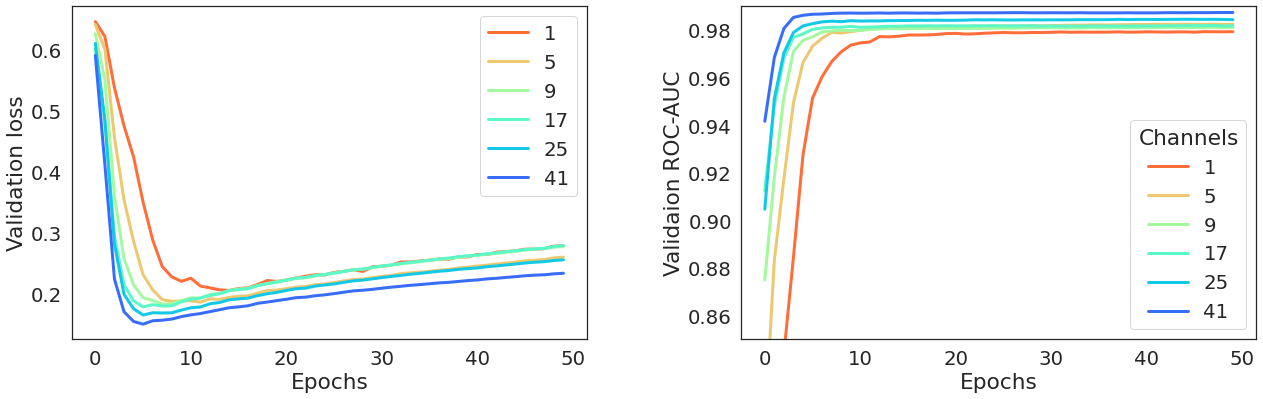

In [22]:
sns.set(style = 'white', font_scale=1.8)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,6), sharex=False, sharey=False, )
ax1, ax2 = axes        


col = 'val_loss'
loss_mean = dfr.groupby(['c']).agg({col: lambda x:x.tolist()})[col].apply(lambda x: np.array(x).mean(axis=0)).apply(pd.Series).T
loss_std = dfr.groupby(['c']).agg({col: lambda x:x.tolist()})[col].apply(lambda x: np.array(x).std(axis=0)).apply(pd.Series).T

loss_mean.columns.name = 'Channels'
loss_std.columns.name = 'Channels'

loss_mean.plot(ax=ax1, lw = 3, color = color)
ax1.set_ylabel('Validation loss')
ax1.set_xlabel('Epochs')
ax1.legend(loc='upper right')
# for i, j in zip(loss_mean.columns, color[:3]):
#     bottom = loss_mean[i]-loss_std[i]
#     up = loss_mean[i] + loss_std[i]
#     ax1.fill_between(loss_mean.index, bottom, up,alpha=0.2, color = j)

#plt.savefig(os.path.join(results_save_folder, 'performance_01_test.png'), bbox_inches='tight', dpi=300)

col = 'val_roc_auc'
acc_mean = dfr.groupby(['c']).agg({col: lambda x:x.tolist()})[col].apply(lambda x: np.array(x).mean(axis=0)).apply(pd.Series).T
acc_std = dfr.groupby(['c']).agg({col: lambda x:x.tolist()})[col].apply(lambda x: np.array(x).std(axis=0)).apply(pd.Series).T


acc_mean.columns.name = 'Channels'
acc_std.columns.name = 'Channels'

acc_mean.plot(ax=ax2, lw = 3, color = color)
ax2.set_ylabel('Validaion ROC-AUC')
ax2.set_xlabel('Epochs')
ax2.set_ylim(0.85, 0.99)

fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3)
plt.savefig('5FCV_valid_covid19.png', bbox_inches='tight', dpi=400)

In [19]:
dfr = pd.read_csv('./5FCV_valid_covid19.csv',index_col=0)
f = lambda x:[float(i) for i in x.replace("[",'').replace("]",'').split(',')]
dfr['roc_auc'] = dfr['roc_auc'].apply(f)
dfr['val_roc_auc'] = dfr['val_roc_auc'].apply(f)
dfr['val_loss'] = dfr['val_loss'].apply(f)
dfr['loss'] = dfr['loss'].apply(f)

In [16]:
color = sns.color_palette("rainbow_r", len(dfr.c.unique())) #PiYG

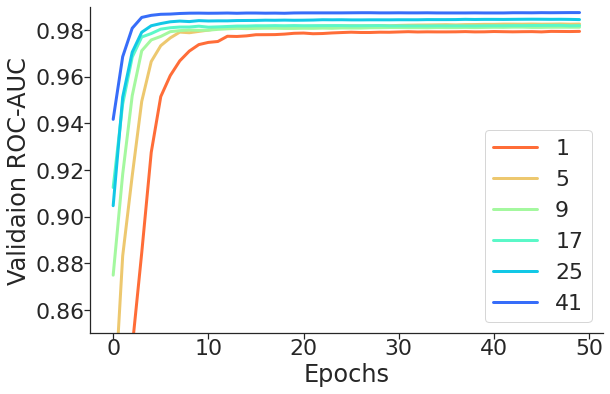

In [24]:
sns.set(style = 'white', font_scale=2)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9,6), sharex=False, sharey=False, )
ax2 = axes        

col = 'val_roc_auc'
acc_mean = dfr.groupby(['c']).agg({col: lambda x:x.tolist()})[col].apply(lambda x: np.array(x).mean(axis=0)).apply(pd.Series).T
acc_std = dfr.groupby(['c']).agg({col: lambda x:x.tolist()})[col].apply(lambda x: np.array(x).std(axis=0)).apply(pd.Series).T


acc_mean.columns.name = 'Channels'
acc_std.columns.name = 'Channels'

acc_mean.plot(ax=ax2, lw = 3, color = color)
ax2.set_ylabel('Validaion ROC-AUC')
ax2.set_xlabel('Epochs')
ax2.set_ylim(0.85, 0.99)
#plt.title('COVMS')

ax2.tick_params(bottom='on', left='off',  labelleft='on', labelbottom='on', pad=-.6,)
sns.despine(top=True, right=True, left=False, bottom=False)

fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3)
#plt.savefig('5FCV_valid_acc.pdf', bbox_inches='tight', dpi=400)

ax2.legend(loc='lower right')
plt.savefig('5FCV_valid_covid19_AUC.pdf', bbox_inches='tight', dpi=400)